![data-x](https://raw.githubusercontent.com/afo/data-x-plaksha/master/imgsource/dx_logo.png)

---
# Data-X: Introduction to Pandas 

**Author list (in no particular order):** [Joshua Rafael Sanchez](https://www.linkedin.com/in/joshua-rafael/), [Alexander Fred-Ojala](https://www.linkedin.com/in/alexanderfo/), [Ikhlaq Sidhu](https://ikhlaq-sidhu.com/), [Elias Castro Hernandez](https://www.linkedin.com/in/ehcastroh/), and [Debbie Yuen](http://www.debbiecyuen.me/) 

**Video Walkthrough:** To view walkthrough of this notebook, click [here](https://youtu.be/tUR7tAsPYaE)

**References and Additional Resources:** See end of this notebook for additional information related to data visualization.

**License Agreement:** Feel free to do whatever you want with this code

___

## Intro to Matplotlib and Seaborn:

This notebook introduces the [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/) Libraries. For each of these libraries, 4 common visualizations across each library are included: **scatter plot**, **horiziontal bar chart**, **column histograms** and a **line plot**.

In [ ]:
# Data processing and visualization
import IPython
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # always import pyplot module as plt (standard)
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

%matplotlib inline
# set plot size
plt.rcParams['figure.figsize'] = (8,6) 

In /home/ehch/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/ehch/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/ehch/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


<br>

**Note:** You will need two .gz files which are not included with this notebook due to size. Download the data by using the following:

> <a href="http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2021-08-06/data/listings.csv.gz" onclick="var that=this;ga('send','event', 'download','listings',this.href);setTimeout(function(){location.href=that.href;},200);return false;">listings.csv.gz</a><br>
> <a href="http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2021-08-06/data/calendar.csv.gz" onclick="var that=this;ga('send','event', 'download','calendar',this.href);setTimeout(function(){location.href=that.href;},200);return false;">calendar.csv.gz</a><br>
> <a href="http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2021-08-06/data/reviews.csv.gz" onclick="var that=this;ga('send','event', 'download','reviews',this.href);setTimeout(function(){location.href=that.href;},200);return false;">reviews.csv.gz</a>

Once downloaded, move them to the working directory for this notebook.        

In [ ]:
## Sanity check ## 
# After you moved your `.gz` files, you should see them here in red
%ls

answer.png                                      google_data.txt
calendar.csv.gz                                 Homework_Part_1.ipynb
DataX_blue_wide_logo.png                        listings_copy.csv
DataX_icon_wide_logo.png                        listings.csv.gz
DELETE_plots-visualization-02.jpg               ny_temps.txt
DELETE_table-visualization-01.png               stocks.png
edited_dataviz-matplotlib-seaborn-sp2020.ipynb  yahoo_data.txt


___

## Reading and Preparing Data

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="missingno_matrix.png" align="center" width="40%" padding="0px"><br>
    <br>
    Visualization of Missing Values (white-space)
</div>

___

<br>

**Working with Zip Files**

Did you know that Pandas allows you to read compressed files?  See [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) for more.

In [ ]:
# this .gz file is a big one, may get flagged 
keep_features = ['id', 'name', 'host_id', 'host_name','neighbourhood', 'latitude', 
                 'longitude', 'room_type', 'price','minimum_nights', 'number_of_reviews', 
                 'last_review', 'reviews_per_month', 'calculated_host_listings_count',
                 'availability_365']

# extract only specific features and data to DataFrame
big_df_1 = pd.read_csv(r'listings.csv.gz', compression='gzip', header=0, sep=',', quotechar='"', error_bad_lines=False, usecols=keep_features)

# Sanity check 1
big_df_1.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,number_of_reviews,last_review,calculated_host_listings_count,reviews_per_month
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Indische Buurt,52.36575,4.94142,Private room,$59.00,3,158,278,2020-02-14,1,2.04
1,9693,Top Location on Canal (Center Flat),32366,Sabine And Sander,Grachtengordel,52.37802,4.89270,Entire home/apt,$119.00,3,17,55,2018-06-29,1,0.44
2,20168,Studio with private bathroom in the centre 1,59484,Alexander,Grachtengordel,52.36509,4.89354,Private room,$100.00,1,31,340,2020-04-09,2,2.72
3,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,Grachtengordel,52.37297,4.88339,Entire home/apt,$125.00,14,212,5,2020-02-09,1,0.17
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Westelijke Eilanden,52.38761,4.89188,Private room,$135.00,2,235,217,2020-03-02,1,2.12


In [ ]:
# extract to DataFrames
big_df_2 = pd.read_csv('calendar.csv.gz', compression='gzip', header=0, sep=',', quotechar='"', error_bad_lines=False)
big_df_2.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,200461,2020-06-10,f,$71.00,$71.00,5.0,30.0
1,200461,2020-06-11,f,$71.00,$71.00,5.0,30.0
2,200461,2020-06-12,f,$71.00,$71.00,5.0,30.0
3,200461,2020-06-13,f,$71.00,$71.00,5.0,30.0
4,200461,2020-06-14,f,$71.00,$71.00,5.0,30.0


<br>

**DataFrame Preparation**


For clarity, the above DataFrames are further narrowed down.
- 1) Dataset for __scatter plot__: 
    - `df_a`: The reviews/month of a post & the number of listings total (regardless of location) under that host, averaged across all listings for specific neighborhood.  (The host is the person who posts the listing.  We are analyzing how involved the average host on Airbnb is for a particular neighbourhood.) 
- 2) Datasets for __horizontal bar chart__: 
    - `df_b`: The number of total listings under that neighbourhood.
    - `db_b_1`: The number of total listings under that neighbourhood under `room_type` __'Entire home/apt'__
- 3) Datasets for __histograms__: 
    - `df_c_1`: Distribution of listings under particular price ranges under under `room_type` __'Entire home/apt'__
    - `df_c_2`: Distribution of listings under particular price ranges under under `room_type` __'Hotel room'__
    - `df_c_3`: Distribution of listings under particular price ranges under under `room_type` __'Private room'__
    - `df_c_4`: Distribution of listings under particular price ranges under under `room_type` __'Shared room'__
- 4) Dataset for __line plot__: 
    - `df_d`: Comparison of average price of listing in San Francisco over time.

<br>

**Note:** do see what Pandas groupby method is doing, click [here](https://www.w3resource.com/pandas/series/series-groupby.php)

<br>

**Clean up**

In [ ]:
# drop any row containing an NaN value
big_df_1 = big_df_1.dropna()

# making sure all features have the same number of entries
#print(df.info(verbose=True))

# in df 'price' is Dtype=object --> '$100` string. Dispose of '$'. Convert to float.
big_df_1.price = big_df_1[['price']].replace('[\$,]', '', regex=True).astype(float)

# sanity check 
print(big_df_1.price[3], type(big_df_1.price[3]))

125.0 <class 'numpy.float64'>


<br>

**Creating `df_a` (from `big_df_1`)**

In [ ]:
# take average per neighbourhood, sort by price descending, and only show 'reviews_per_month' and 'calculated_host_listing_count'
df_a = big_df_1.groupby('neighbourhood').agg('mean').sort_values(by='price', ascending=False)[['reviews_per_month', 'calculated_host_listings_count']]
df_a.head()

,reviews_per_month,calculated_host_listings_count
neighbourhood,,
De Wallen,1.893333,3.277778
Buiksloterham,1.018621,3.112069
Museumkwartier,0.896271,1.694915
Amsterdam Centrum,1.381847,3.420959
Grachtengordel,1.182678,3.114017


<br>

**Creating `df_b` and `df_b_1` (from `big_df_1`)**

In [ ]:
# count units per neighbourhood and sort descending
df_b = big_df_1.groupby('neighbourhood').agg('count')['id'].sort_values(ascending=False)
df_b.head()

neighbourhood
Oud-West          2856
Oud-Zuid          1468
Bos en Lommer     1013
Grachtengordel     956
Indische Buurt     890
Name: id, dtype: int64

In [ ]:
# count single family units per neighbourhood and sort descending
df_b_1 =  big_df_1[big_df_1['room_type'] == 'Entire home/apt'].groupby('neighbourhood').agg('count')['id'].sort_values(ascending=False)
df_b_1.head()

neighbourhood
Oud-West           2376
Oud-Zuid           1219
Bos en Lommer       865
Indische Buurt      752
Oosterparkbuurt     742
Name: id, dtype: int64

<br>

**Creating `df_c_1`, `df_c_2`, `df_c_3`, and `df_c_4` (from `big_df_1`)**

In [ ]:
# split by group, and get unique room_types: 'Entire home/apt', 'Hotel room', 'Private room', 'Shared room'
df_c_types = big_df_1.groupby('room_type').agg('count').index

# index object
df_c_types

Index(['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'], dtype='object', name='room_type')

In [ ]:
# from df get all units based on room_type using df_c_types and sort them descending by price
df_c_1 = big_df_1[big_df_1['room_type'] == df_c_types[0]]['price'].sort_values(ascending=False) # integer indexing [0] -> 'Entire home/apt'
df_c_2 = big_df_1[big_df_1['room_type'] == df_c_types[1]]['price'].sort_values(ascending=False) # 'Hotel room'
df_c_3 = big_df_1[big_df_1['room_type'] == df_c_types[2]]['price'].sort_values(ascending=False) # 'Private room'
df_c_4 = big_df_1[big_df_1['room_type'] == df_c_types[3]]['price'].sort_values(ascending=False) # 'Shared room'

# sanity check
df_c_4.head()

18515    1000.0
18634    1000.0
15418    1000.0
15416    1000.0
16594     500.0
Name: price, dtype: float64

<br>

**Creating `df_d` (from `big_df_2`)**

In [ ]:
# extract and convert 'price' entries from string to float
df_d_to_append = big_df_2[['price']].replace('[\$,]', '', regex=True).astype(float)

# extract date series
df_d_other = big_df_2[['date']]

# group all prices by data and find daily average. Join into new DataFrame
df_d = df_d_other.join(df_d_to_append).groupby('date').agg(np.mean)

# sanity check
df_d.head(5)

,price
date,
2020-06-08,151.741834
2020-06-09,145.763574
2020-06-10,161.234519
2020-06-11,159.605447
2020-06-12,163.359155


___

<br>

### Data Visualization 

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="matplotlib_and_seaborn_thumbnail_edit1-01.png" align="center" width="50%" padding="0px"><br>
    <br>
</div>

___

<br>

### Matplotlib

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="matplotlib_logo.png" align="center" width="25%" padding="0px"><br>
    <br>
</div>



<br>

#### Scatter Plot (Example of data which visualizes relationships.)

___

> Each point represents the data of a specific neighbourhood of San Francisco.<br>  


In [ ]:
# Importing library
#import matplotlib.pyplot as plt

In [ ]:
# OPTIONAL: for your reference, how df_a looks like (snippet of 3 rows):
df_a.head(3)

,reviews_per_month,calculated_host_listings_count
neighbourhood,,
De Wallen,1.893333,3.277778
Buiksloterham,1.018621,3.112069
Museumkwartier,0.896271,1.694915


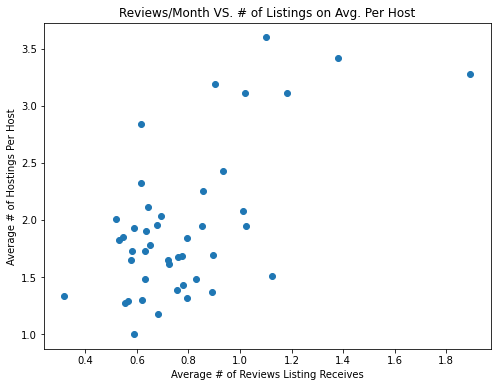

In [ ]:
# run this cell to create scatter plot
plt.scatter(df_a['reviews_per_month'], df_a['calculated_host_listings_count']) # load in columns of dataframe
plt.xlabel('Average # of Reviews Listing Receives')
plt.ylabel('Average # of Hostings Per Host')
plt.title('Reviews/Month VS. # of Listings on Avg. Per Host')
plt.show()

#### Horizontal Bar Chart (Example of chart showing the composition of data.)
___

> This is a horizontal bar chart showing the total number of Airbnb entries for a neighbourhood in San Francisco.<br>
> **Tip:** Further explaination/code of how to create a horizontal barplot [here](https://python-graph-gallery.com/2-horizontal-barplot/)

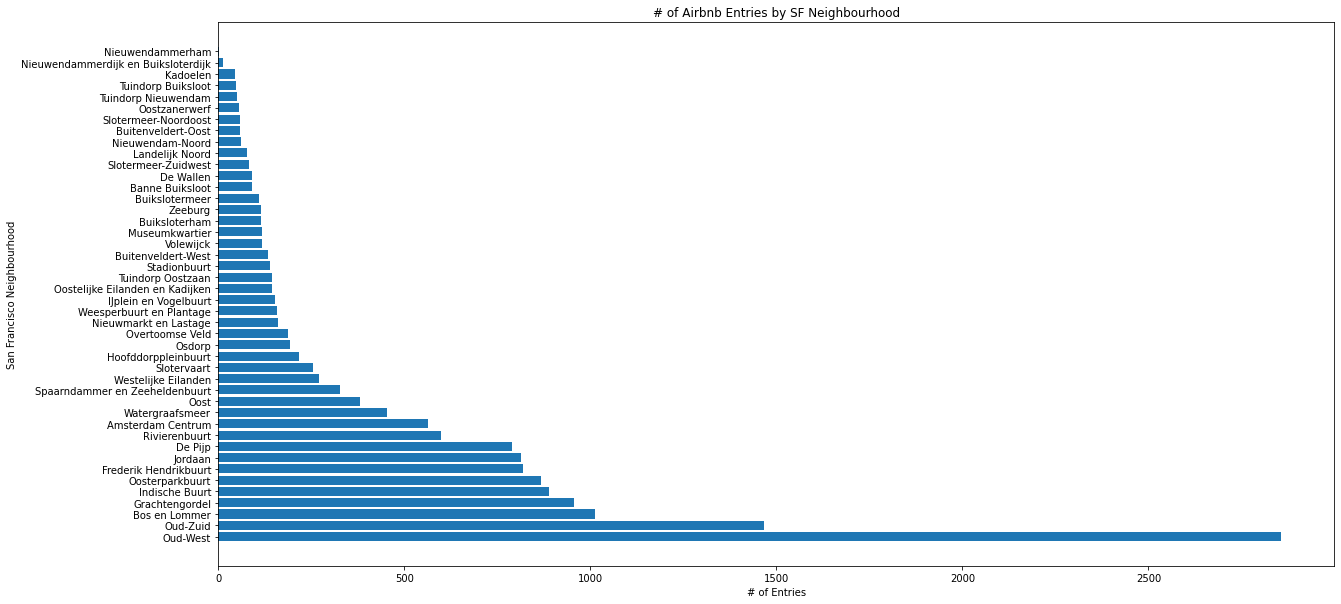

In [ ]:
# run this cell to create horizontal bar chart
# step 1: define your numbers (data pre-processing)
y_pos = np.arange(len(df_b))
bars = df_b.index
height = df_b

# step 2: plot in this order
plt.figure(figsize=(20,10)) # make figure the right shape
plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.xlabel('# of Entries')
plt.ylabel('San Francisco Neighbourhood')
plt.title('# of Airbnb Entries by SF Neighbourhood')
plt.show()

#### Column Histogram (Example of showing the quantitative distribution of data.)

___

> These 4 histograms below each show the distribution of listings by price.  Each histogram shows the distribution of a specific `room_type`.<br>
> **Note:** The reason why these histograms are separate and not laid on top of each other is because the resulting overlaid plot isn't very helpful visually.

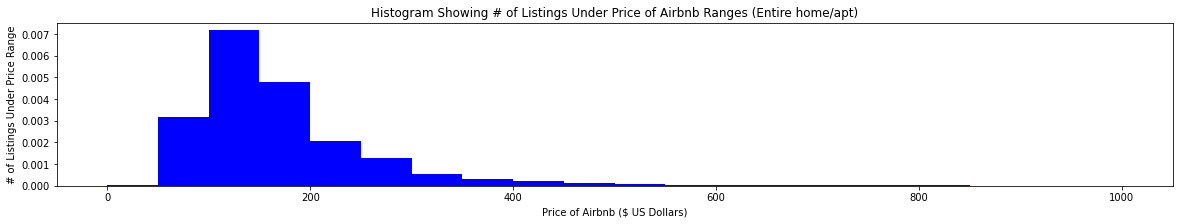

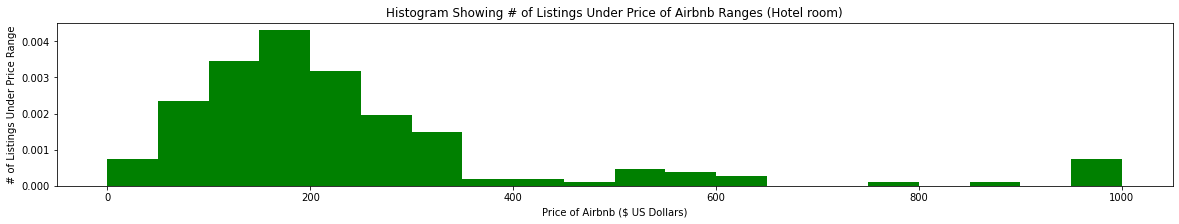

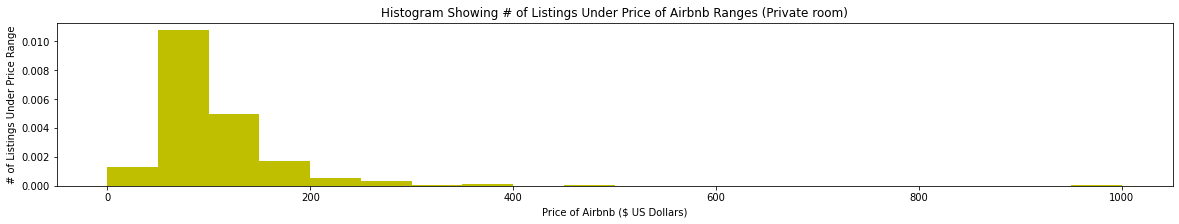

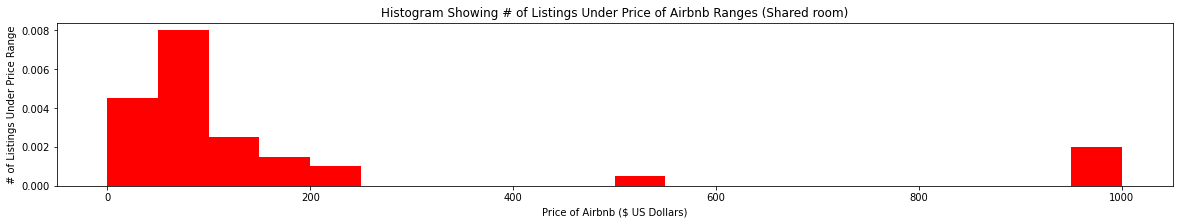

In [ ]:
# run this cell to generate histogram 
# must do data cleaning before modeling (some points ommitted, but not important for purposes of demonstration)
plt.figure(figsize=(20, 3))
plt.hist(df_c_1, bins = np.arange(0,1001,50), density = True, color = 'b')
plt.xlabel('Price of Airbnb ($ US Dollars)')
plt.ylabel('# of Listings Under Price Range')
plt.title('Histogram Showing # of Listings Under Price of Airbnb Ranges (Entire home/apt)')
plt.show()

plt.figure(figsize=(20, 3))
plt.hist(df_c_2, bins = np.arange(0,1001,50), density = True, color = 'g')
plt.xlabel('Price of Airbnb ($ US Dollars)')
plt.ylabel('# of Listings Under Price Range')
plt.title('Histogram Showing # of Listings Under Price of Airbnb Ranges (Hotel room)')
plt.show()

plt.figure(figsize=(20, 3))
plt.hist(df_c_3, bins = np.arange(0,1001,50), density = True, color = 'y')
plt.xlabel('Price of Airbnb ($ US Dollars)')
plt.ylabel('# of Listings Under Price Range')
plt.title('Histogram Showing # of Listings Under Price of Airbnb Ranges (Private room)')
plt.show()

plt.figure(figsize=(20, 3))
plt.hist(df_c_4, bins = np.arange(0,1001,50), density = True, color = 'r')
plt.xlabel('Price of Airbnb ($ US Dollars)')
plt.ylabel('# of Listings Under Price Range')
plt.title('Histogram Showing # of Listings Under Price of Airbnb Ranges (Shared room)')
plt.show()

#### Line Plot (Example of comparing quantitative data over time.)

___

> This line plot shows a line plot of the average Airbnb listing price in San Francisco over time.<br>
> __Note:__ Click for some [sources](https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/) that may help [make dates](https://matplotlib.org/3.1.1/gallery/recipes/common_date_problems.html) for your plots look better. 

In [ ]:
# importing matplotlib.dates (will be helpful in showing the graph)
import matplotlib.dates as mdates

In [ ]:
# setting up only specific dates to be shown:
# making array of dates for x-axis. 
strdates = ['2020-06-08', '2020-07-08', '2020-08-08', '2020-09-08', '2020-10-08',
           '2020-11-08', '2020-12-08', '2021-01-08', '2021-02-08', '2021-03-08',
           '2021-04-08', '2021-05-08', '2021-06-07']
df_d_edit = df_d.loc[strdates] # get only specific dates to show.
df_d_edit.head(5)

,price
date,
2020-06-08,151.741834
2020-07-08,160.370575
2020-08-08,165.883262
2020-09-08,162.837838
2020-10-08,164.037001


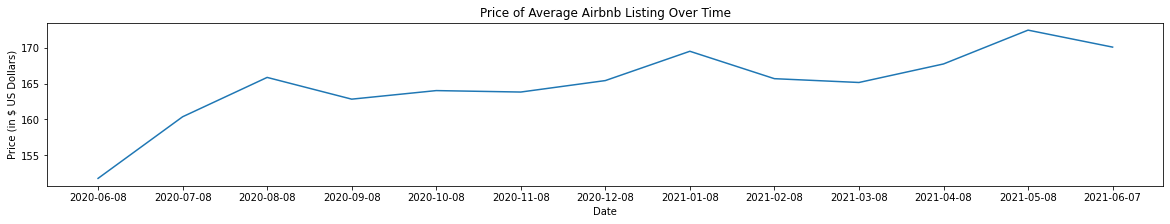

In [ ]:
# run this cell to generate line plot
plt.figure(figsize=(20,3))
plt.plot(df_d_edit.index, df_d_edit['price'])
plt.xlabel('Date')
plt.ylabel('Price (in $ US Dollars)')
plt.title('Price of Average Airbnb Listing Over Time')
plt.show()

___

<br>

## Seaborn

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="seaborn.png" align="center" width="55%" padding="0px"><br>
    <br>
</div>

<br>

> Here, the four plots have the exact same data visualization; but instead, the following four are done in Seaborn rather than Matplotlib. <br>
> Some key differences to note when you are going through the second four data visualizations:
- The following four plots are done in a **Pythonic** manner of conding.
- Seaborn has additional features which make the visualizations more aesthetically pleasing.

<br>

#### Scatter Plot (Example of data which visualizes relationships.)
___

In [ ]:
# import seaborn
import seaborn as sns

# optional, there are different options 
sns.set(style = 'whitegrid') 

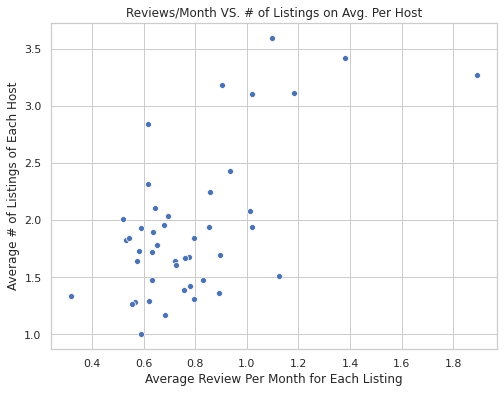

In [ ]:
# create scatterplot
# reminder: this is done in Pythonic code (recommended way)

ax = sns.scatterplot(x = 'reviews_per_month', y = 'calculated_host_listings_count', data = df_a)
ax.set(xlabel = 'Average Review Per Month for Each Listing',
      ylabel = 'Average # of Listings of Each Host',
      title = 'Reviews/Month VS. # of Listings on Avg. Per Host')
plt.show()

<br>

#### Horizontal Bar Chart (Example of chart showing the composition of data.)
___


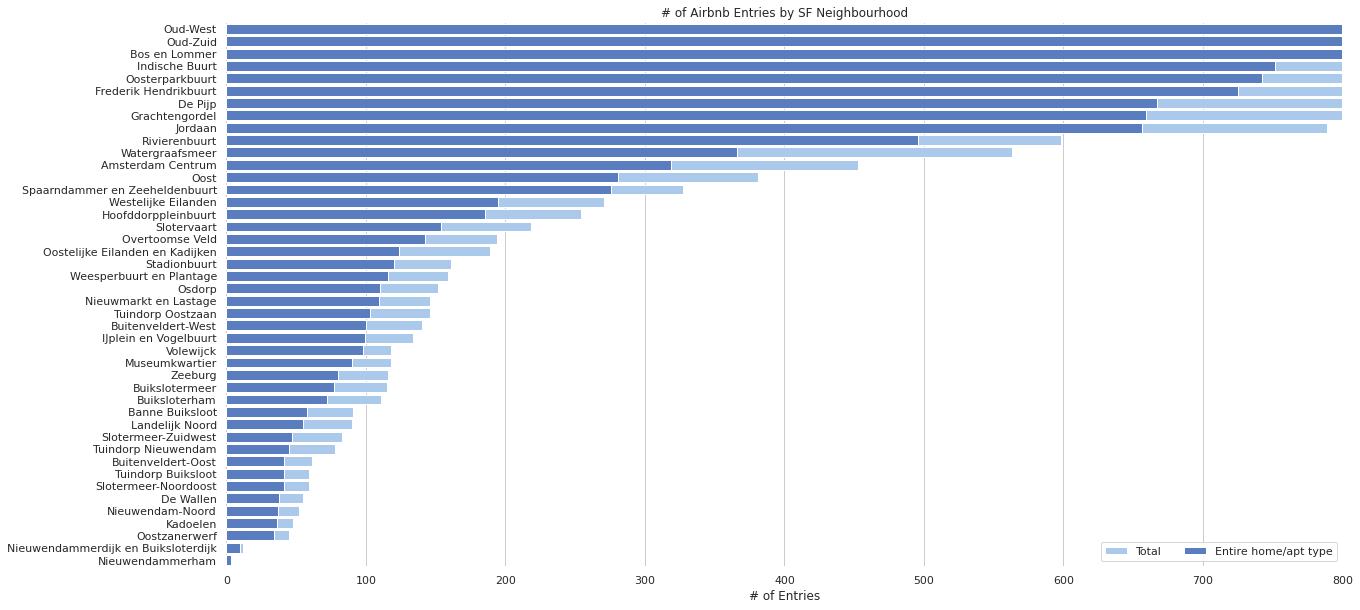

In [ ]:
# run this cell to create bar chart
f, ax = plt.subplots(figsize=(20,10))
sns.set_color_codes("pastel")
sns.barplot(x=df_b.values, y=df_b.index,
            label="Total", color="b")

sns.set_color_codes("muted")
sns.barplot(x=df_b_1.values, y=df_b_1.index,
            label="Entire home/apt type", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 800), ylabel="",
       xlabel="# of Entries",
      title='# of Airbnb Entries by SF Neighbourhood')
sns.despine(left=True, bottom=True)

<br>

#### 2C. Column Histogram (Example of showing the quantitative distribution of data.) 

___

Click for additional information on [horizontal barplots](https://seaborn.pydata.org/examples/horizontal_barplot.html), and [histograms sharing a figure](https://stackoverflow.com/questions/36362624/how-to-plot-multiple-histograms-on-same-plot-with-seaborn) (i.e. multiple graphs on same plot).

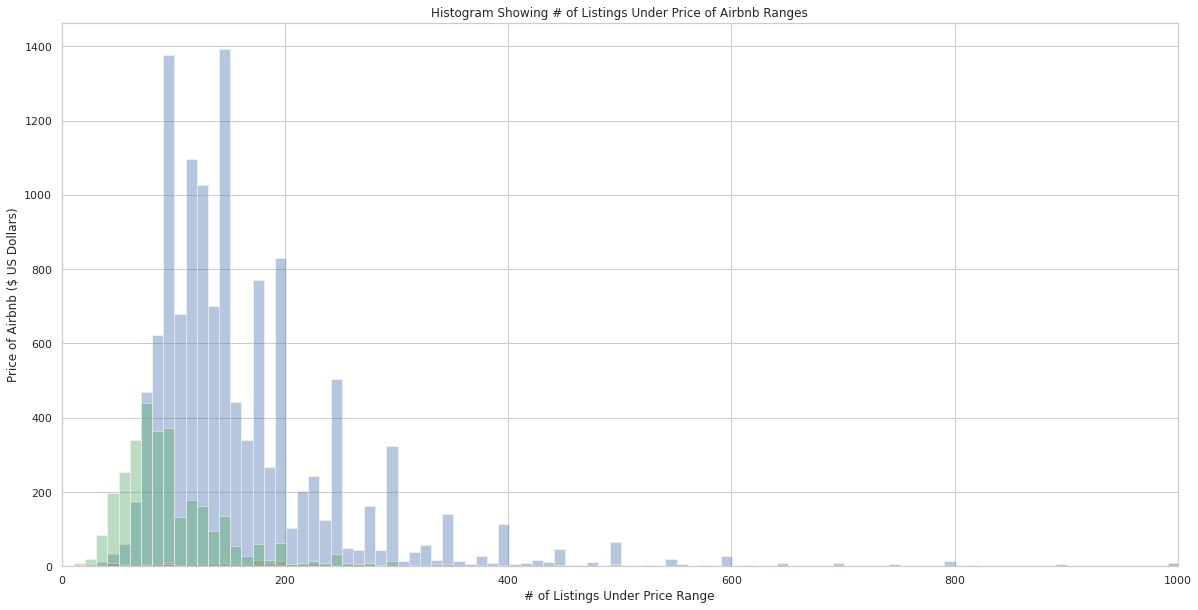

In [ ]:
# run this cell to create multiple histograms
fig, ax = plt.subplots(figsize=(20,10))
for a in [df_c_1, df_c_2, df_c_3, df_c_4]:
    sns.distplot(a, bins=range(1, 1010, 10), ax=ax, kde=False)
ax.set(xlim = (0,1000),
      ylabel = 'Price of Airbnb ($ US Dollars)',
      xlabel = '# of Listings Under Price Range',
      title = 'Histogram Showing # of Listings Under Price of Airbnb Ranges')
plt.show()

<br>

#### Line Plot (Example of comparing quantitative data over time.)
___

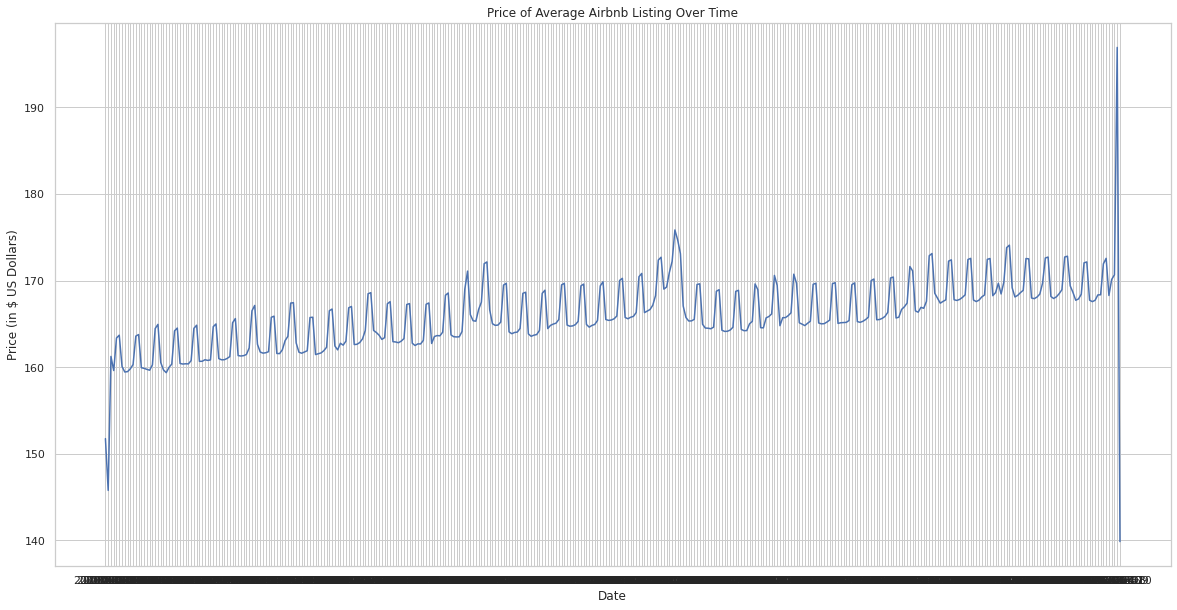

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x=df_d.index, y=df_d['price'])
plt.xlabel('Date')
plt.ylabel('Price (in $ US Dollars)')
plt.title('Price of Average Airbnb Listing Over Time')
plt.show()

___

## References and Additional Resources
___

#### Install Matplotlib

https://www.nltk.org/install.html

```bash
    # on a terminal or using hot keys
    python -m pip install -U pip
    python -m pip install -U matplotlib
```

<br>

#### Install Seaborn

https://seaborn.pydata.org/installing.html

```bash
    # Install using conda
    $ conda install seaborn
```

```bash
    # Install using pip
    $ pip install seaborn
```
___

#### Data description
>Data source: http://insideairbnb.com/get-the-data.html<br>
>Data Sets:<br>
>* ```listings.csv``` --> Detailed Listings data for Amsterdam. Comprised of 96 attributes -- including price (continuous), longitude (continuous), latitude (continuous), listing_type (categorical), neighbourhood (categorical), and ratings (continuous) among others <br>
>* ```calendar.csv``` --> Detailed Calendar Data for listings in Amsterdam. Consisting of four attributes -- namely, listing_id (discrete), date (datetime), available (categorical), and price (continuous).<br>
>* ```reviews.csv``` &nbsp; --> Detailed Review Data for listings in Amsterdam. Key attributes are date (datetime), listing_id (discrete), reviewer_id (discrete), and comment (textual)

___

#### What Would You Like to Visualize...

<div align="center">
    <img src= "Matplotlib_seaborn_visualization_types.png" align="center" width='70%'>
</div>

<br>

___

#### Matplotlib Object Hierarchy



<div align="center">
    <img src= "https://files.realpython.com/media/fig_map.bc8c7cabd823.png" align="center" width='15%'>
   
    https://realpython.com/python-matplotlib-guide/
</div>

<br>

Understanding pythonic data visualization will not only save you time, but also make design and debugging much easier.  For details on the Matplotlib visualization objects, see below. For a comprehensive walkthrough of pythonic Maplotlib and Seaborn, see [this repo](https://github.com/ehcastroh/visualizations_and_visual_storytelling) by Elias Castro Hernandez.

<br>

[**Figure** ](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.figure.html)
> Outermost container for a matplotlib graphic.<br>
> Can contain multiple **axes** objects.<br>
> Must be declared prior to populating **axes**.

[**Axes**](https://matplotlib.org/api/axes_api.html)
> Actual plots<br>
> Each **axes** contains smaller objects such as tick marks, individual lines, legends, and text boxes.<br>
> Can be declared/modifed prior/after the **figure** is declared

[**Artist**](https://matplotlib.org/tutorials/intermediate/artists.html)
> Everything you can see on the figure is an **artist**, including Figure, Axes, Axis-objects, text-object, etc.<br>
> Most **artists** are tied to an **axes** -- an **artist** cannot be shared by, or moved from one to another, **axes**.<br>
> Can be declared/modified prior/after **axes**<br>
> Typical user will spend 95% of their time working with the **artists**. 

___

#### RISE Executable Slide Deck

**About RISE:** We are increasingly becoming accustomed to interacting with information, and this is an area where RISE offers a powerful alternative to Slides/Powerpoint.  RISE allows you to create slide-like presentations, where slides can fully execute code. This grants profound opportunities to both create more engaging visual storytelling, and allow your users an opportunity to interact with the information you present.



<br>

**Install RISE**

**Note:** Anaconda does not come with seaborn, please install it in your virtual environment by running:
```bash
# in a new terminal
conda intall -c conda-forge rise # recommended approach
```
OR
```python
# in jupyter using magic keys and python
! pip install RISE 
! jupyter-nbextension install rise --py --sys-prefix
```


- **RISE:** is a **Live** slideshow framework, rendered using *Reveal.js*, that enables users to create beautiful HTML-based  presentations.

<br>

**Create a Slideshow**

>**Create Notebook:** just do what you would normally do.<br>
>**Change to Presentation Mode:** Whenver you are ready, just follow the following:


<div align="center">
    <img src= "02c_Visualiation_load_RISE.svg" align="center" width="50%">
    <br>
</div>

<br>

**Select the Slide Type and Present**

> **slide:** this cell is the beginning of a new slide<br>
> **subslide:** this cell is the beginning of a new subslide; that is to say, a new slide, but that reveal.js will display below the previous one instead of on the right<br>
> **fragment:** this is to split the contents of one slide into pieces; a cell marked as a fragment will create a break inside the slide; it will not show up right away, you will need to press Space one more time to see it.<br>
> **skip:** this cell are ignored altogether in reveal mode, it will not appear either in the main view, nor in the speaker view.<br>
> **notes:** similarly, this cell is marked to be discarded from the main view, but is meant to appear in the speaker view.


___

#### Visualize Missing Data

[Missingno](https://github.com/ResidentMario/missingno) is a Python library taht visualizes the distribution of `NaN` values.  It is fully compatible with Pandas, and as such can serve as an excellent data prepossessing step.

In [ ]:
# install the library
#! pip install missingno

In [ ]:
# import libraries
import pandas as pd
import missingno as msno
%matplotlib inline

In /home/ehch/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/ehch/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/ehch/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [ ]:
# load data
data = pd.read_csv('listings_copy.csv')

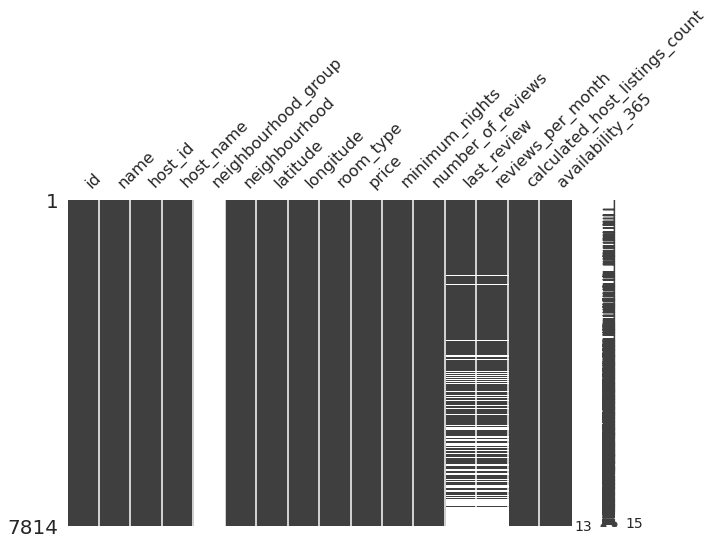

In [ ]:
# Visualize missing values as a matrix 
msno.matrix(data, figsize = (10, 6)) 

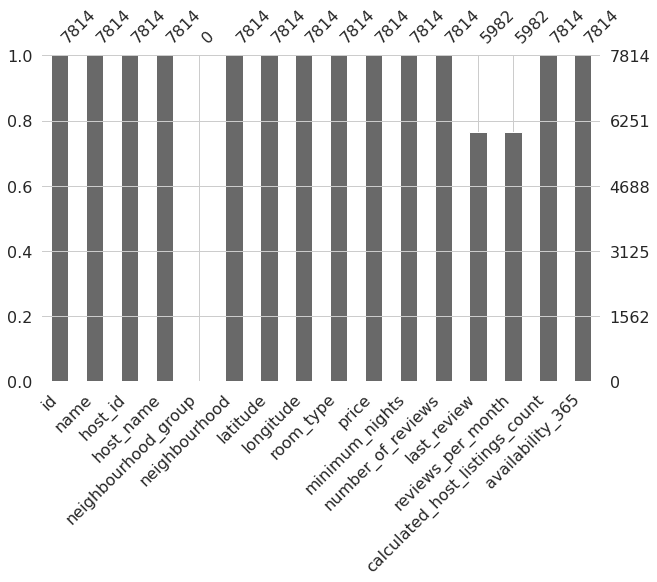

In [ ]:
# Visualize missing values as a bar chart 
msno.bar(data, figsize = (10, 6)) 

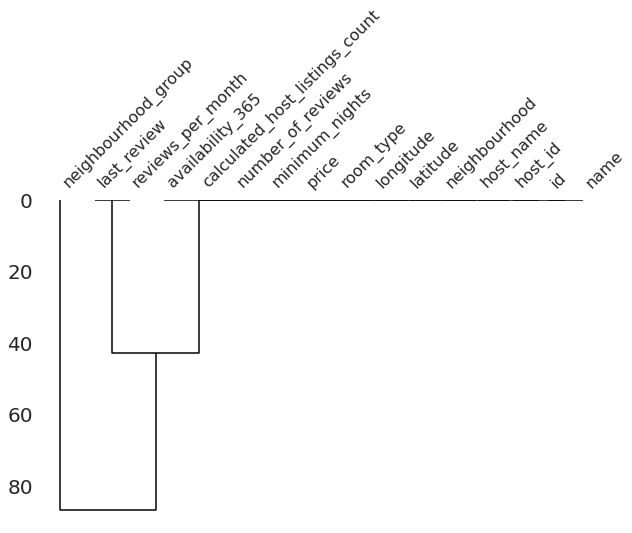

In [ ]:
# Visualize missing data as a dendrogram
msno.dendrogram(data, figsize = (10, 6))

___

## Additional Content and Sources


> [Joshua's Data Visulization Resources Doc](https://docs.google.com/document/d/1ShLBukv2lFPYJ8pU009BQ2lr0JXy8CazLfEceB71BWg/)<br>
> [Matplotlib Gallery](https://matplotlib.org/1.4.3/gallery.html#)<br>
> [The Python Graph Gallery](https://python-graph-gallery.com/)<br> 
> [Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)<br>
> [Interactive Visualization-Type Search Tree (Based on Data Type)](https://www.data-to-viz.com/)<br>
> [Visualization with Matplotlib by O'Reilly](https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html)

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="DataX_icon_wide_logo.png" align="center" width="50%" padding="0px"><br>
    <br>
</div>

___